# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint


####Classification using MLP with Cross Entropy Loss

The objective of this case study is to understand classification i.e., if the price of the house is low (0) or high (1) using Multilayer perceptron with Cross Entropy Loss.  The package used here is [PyTorch](https://pytorch.org/). 

#### Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P18_test" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "912345678" #@param {type:"string"}


In [0]:
#@title Run this cell to complete the setup for this Notebook

from IPython import get_ipython
ipython = get_ipython()
  
notebook="BLR_M2W6_SUN_CS_1" #name of the notebook

def setup():
    #ipython.magic("sx wget https://www.dropbox.com/s/vu7xkf6j3v9p5np/AIML_DS_REGR01_SIMPLEPENDULUMOSCILLATIONDATA.txt.zip?dl=1")
   # ipython.magic("sx unzip AIML_DS_REGR01_SIMPLEPENDULUMOSCILLATIONDATA.txt.zip?dl=1")
    ipython.magic("sx pip install torch")
    print ("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print("Please enter valid Id")
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "id" : Id, "file_hash" : file_hash, "notebook" : notebook}

      r = requests.post(url, data = data)
      print("Your submission is successful. Ref:", submission_id)
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


## Importing required packages for the experiment

In [0]:
# Importing required Packages
import matplotlib.pyplot as plt
import numpy as np
import  torch
from torch import nn
from sklearn.preprocessing import StandardScaler

In [0]:
#The attributes of related House price are stored in "X" as features. 
X = np.array([[3, 2000, 90], [2, 800, 143], [2, 850, 167], [1, 550, 267], [4, 2000, 396]])
#The House price whether it is low (0) or high (1) are stored in "y" as labels.
y = np.array([1, 0, 0, 0 , 1])



In [0]:
#Standard scaling the features "X"
ss = StandardScaler()
ss.fit(X)
X = ss.transform(X)
X

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.58834841,  1.20863526, -1.13296108],
       [-0.39223227, -0.6997362 , -0.64318182],
       [-0.39223227, -0.62022073, -0.42139498],
       [-1.37281295, -1.09731359,  0.50271682],
       [ 1.56892908,  1.20863526,  1.69482106]])

In [0]:
#Defining the model for Linear Classification with MLP using PyTorch's nn.Module

class LinearClassificationModel(nn.Module):

    def __init__(self, input_dim, output_dim):

        super(LinearClassificationModel, self).__init__() 
        # Calling Super Class's constructor
        self.linear1 = nn.Linear(input_dim, 4)
        self.linear2 = nn.Linear(4, output_dim)
        self.activation= nn.Sigmoid()
        # nn.Linear is defined in nn.Module

    def forward(self, x):
        # Here the forward pass is simply a linear function
        #print(x.size())
        out = self.linear1(x)
        out = self.linear2(out)
        out = self.activation(out)
        return out

input_dim = 3
output_dim = 2

From the above defined model, we 3 neurons in the input layer, 4 neurons in the hidden layer and 2 neurons in the output layer.

![alt text](https://cdn.talentsprint.com/aiml/Experiment_related_data/IMAGES/MLP_classification.png)

In [0]:
model = LinearClassificationModel(input_dim,output_dim) #The LinearClassificationModel() is saved in model
criterion = nn.CrossEntropyLoss() #The criterion or the loss used is CrossEntropyLoss
l_rate = 0.01  #Learning Rate
optimiser = torch.optim.SGD(model.parameters(), lr = l_rate) #Stochastic Gradient Descent

epochs = 5000  #number of epochs

Here, we are using Cross Entropy Loss for two classes and Stochastic Gradient Descent on the entire batch.


This criterion combines :func:`nn.LogSoftmax` and :func:`nn.NLLLoss` in one single class.

The loss can be described as:

$loss(x,class) = -log(\frac{exp(x[class])}{\sum_{j}exp(x[j])}) 
                        = -x[class] + log(\sum_{j}exp(x[j]))$
 
The losses are averaged across observations for the batch.

For more details, can follow this [link](https://pytorch.org/docs/stable/_modules/torch/nn/modules/loss.html). 

In [0]:
#Storing the losses in a list for the prescribed epochs 
losses = []
for epoch in range(epochs):
#increase the number of epochs by 1 every time
    epoch +=1
  #inputs and labels are stored in a particular format as per the model
    inputs = torch.from_numpy(X.astype(np.float32))
    labels = torch.from_numpy(y.astype(np.float32))
    labels = labels.type(torch.long)  
    #clear grads as discussed in prev post
    optimiser.zero_grad()
    #forward to get predicted values
    outputs = model.forward(inputs)
    print('outputs: ', outputs)
    print('labels: ', labels)
    print('outputs size: ', outputs.size())
    print('labels size: ', labels.size())
    loss = criterion(outputs,labels)
    print('loss:', loss)
    loss.backward()# back props
    optimiser.step()# update the parameters
    print('epoch {}, loss {}'.format(epoch,loss.item()))
    losses.append(loss.item())
    if (epoch-1)%50 == 0:
        for i in model.parameters():
            print(i)

outputs:  tensor([[0.5274, 0.4117],
        [0.5892, 0.4660],
        [0.5947, 0.4669],
        [0.6547, 0.4835],
        [0.5726, 0.4687]], grad_fn=<SigmoidBackward>)
labels:  tensor([1, 0, 0, 0, 1])
outputs size:  torch.Size([5, 2])
labels size:  torch.Size([5])
loss: tensor(0.6750, grad_fn=<NllLossBackward>)
epoch 1, loss 0.6750216484069824
Parameter containing:
tensor([[ 0.0118, -0.2458,  0.2447],
        [-0.3649,  0.1132,  0.0272],
        [-0.4374, -0.1074, -0.0330],
        [-0.3468, -0.3102, -0.0038]], requires_grad=True)
Parameter containing:
tensor([ 0.4427, -0.4320,  0.0317,  0.0821], requires_grad=True)
Parameter containing:
tensor([[ 0.4857,  0.2353,  0.4079, -0.3391],
        [ 0.3085, -0.2979,  0.1233,  0.0118]], requires_grad=True)
Parameter containing:
tensor([ 0.2591, -0.4338], requires_grad=True)
outputs:  tensor([[0.5271, 0.4119],
        [0.5895, 0.4657],
        [0.5950, 0.4667],
        [0.6553, 0.4831],
        [0.5720, 0.4690]], grad_fn=<SigmoidBackward>)
labe

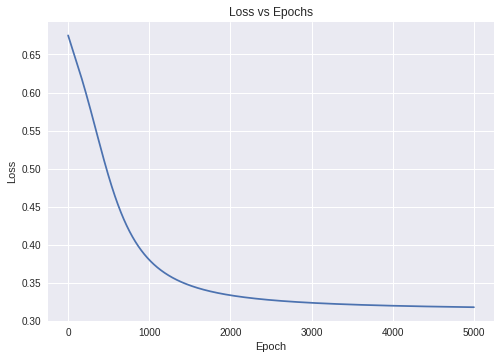

In [0]:
#Plotting Loss vs Epochs 
fig,ax = plt.subplots(1)
plt.title('Loss vs Epochs')
ax.plot(losses)
#ax.set_xticklabels([])
#ax.set_yticklabels([])
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
plt.savefig('Loss_vs_Epoch.png')

### Please answer the questions below to complete the experiment:

In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Too Simple, I am wasting time" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "test" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "No" #@param ["Yes", "No"]

In [0]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful. Ref: 14870
